# Introduction

The first step, and notably the most difficult, is to define the kinematic relationships (i.e. motion) among rigid bodies in the system. Here will we make use of `ReferenceFrame` objects to describe the four frames in the problem, set their orientations, and then construct vectors in the frames that position various important `Point`s. Finally, we will specify the linear and angular velocities of the frames and points using generalized speeds.

# Setup

First, import the necessary functions from SymPy that will allow us to construct time varying vectors in the four reference frames.

In [1]:
from __future__ import print_function, division
from sympy import symbols, simplify
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point

SymPy has a rich printing system. Here we initialize printing so that all of the mathematical equations are rendered in standard mathematical notation.

In [2]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

The IPython notebook can display rich content. We will use the Image function to import some images for reference.

In [3]:
from IPython.display import Image

# Reference Frames and Orientation

Our first step is to define three reference frames, one each for the lower leg, upper leg, and torso. These reference frames hold the information that defines how each frame is oriented relative to each other in addition to their relative angular velocites and angular accelerations. We start by creating four reference frames for each frame in the system. The initialization of the torso frame is left for a later exercise.

In [4]:
inertial_frame = ReferenceFrame('I')

In [5]:
lower_leg_frame = ReferenceFrame('L')

In [6]:
upper_leg_frame = ReferenceFrame('U')

Now we need to specify how the frames are oriented with respect to each other. To do this, we need to define the three generalized coordinates, $\theta_1(t)$, $\theta_2(t)$, and $\theta_3(t)$, for the ankle, knee, and hip angles which are time varying quantities.

In [7]:
theta1, theta2, theta3 = dynamicsymbols('theta1, theta2, theta3')

We can start by setting the orientation of the lower leg relative to the inertial reference frame. We'd like the lower leg to rotate through the angle $\theta_1$ relative to the inertial frame. $\theta_1$ is the plantarflexion angle of the ankle. The `ReferenceFrame.orient()` method makes this easy. Simply give the base frame, `Axis` type of rotation, and a tuple containing the rotation angle, and the vector about which to rotate, in this case the Z unit vector of the inertial reference frame.

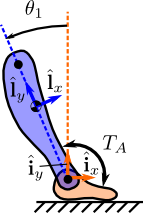

In [8]:
Image('figures/ankle_joint.png')

In [9]:
lower_leg_frame.orient(inertial_frame, 'Axis', (theta1, inertial_frame.z))

We now can see that the direction cosine matrix relating the two reference frames has been set on both frames.

In [10]:
lower_leg_frame.dcm(inertial_frame)

Matrix([
[ cos(theta1), sin(theta1), 0],
[-sin(theta1), cos(theta1), 0],
[           0,           0, 1]])

In [11]:
inertial_frame.dcm(lower_leg_frame)

Matrix([
[cos(theta1), -sin(theta1), 0],
[sin(theta1),  cos(theta1), 0],
[          0,            0, 1]])

We can rotate the upper leg relative to the lower leg through the knee flexion angle, $\theta_2$, in a similar fashion. 

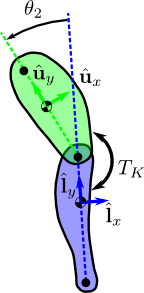

In [12]:
Image('figures/knee_joint.png')

In [13]:
upper_leg_frame.orient(lower_leg_frame, 'Axis', (theta2, lower_leg_frame.z))

Now that we have two reference frames chained, we can show the direction cosine matrices of the uppper leg (one end of the chain) to the inertial reference frame (the other end of the chain).

In [14]:
upper_leg_frame.dcm(inertial_frame)

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2),  sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), 0],
[-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0],
[                                                 0,                                                  0, 1]])

Notice that thedirection cosine matrix isn't in its simplest form. We can be simplified with using the `simplify()` function.

In [15]:
simplify(upper_leg_frame.dcm(inertial_frame))

Matrix([
[ cos(theta1 + theta2), sin(theta1 + theta2), 0],
[-sin(theta1 + theta2), cos(theta1 + theta2), 0],
[                    0,                    0, 1]])

## Exercise

Now as an excercise, define a `torso_frame` with the name `T` and rotate it relative to the upper leg through the hip extension angle, $\theta_3$. Lastly show the simplified direction cosine matrix of the torso with respect to the inertial reference frame.

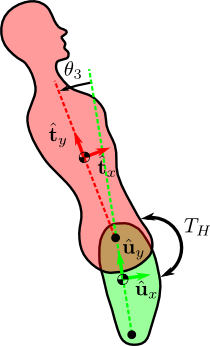

In [16]:
Image('figures/hip_joint.png')

In [ ]:
# Enter and run your answer here


In [18]:
# %load exercise_solutions/n03_kinematics_rotate-frame.py
torso_frame = ReferenceFrame('T')
torso_frame.orient(upper_leg_frame, 'Axis', (theta3, upper_leg_frame.z))
simplify(torso_frame.dcm(inertial_frame))


Matrix([
[ cos(theta1 + theta2 + theta3), sin(theta1 + theta2 + theta3), 0],
[-sin(theta1 + theta2 + theta3), cos(theta1 + theta2 + theta3), 0],
[                             0,                             0, 1]])

# Point and Locations

To derive the equations of motion of a system we need to have defined the velocities of the mass centers of each rigid body. We will first define points that locate the joints: ankle, knee, and hip to simplify the mass centers of the lower leg, upper leg, and torso.

## Joints

The ankle will be our based point and all other point will be defined with respect to the ankle. The ankle will be considered fixed in the inertial reference frame, i.e. $^I\mathbf{v}^A=0$

In [19]:
ankle = Point('A')

The knee is defined with respect to the ankle with a vector that is the length from the ankle to the knee, $l_L$, in the direction of the lower leg $\hat{\mathbf{l}}_y$ unit vector. We need the constant length and a new point $K$.

In [20]:
lower_leg_length = symbols('l_L')

In [21]:
knee = Point('K')

The position is set with the `Point.set_pos()` method, giving the reference point and the vector.

In [22]:
knee.set_pos(ankle, lower_leg_length * lower_leg_frame.y)

The position from any other point can then be found using the `Point.pos_from()` method.

In [23]:
knee.pos_from(ankle)

l_L*L.y

It is also possible to express the returned vector in another reference frame. For example, you may want to know the position of the knee in the coordinates of the inertial reference frame.

In [24]:
knee.pos_from(ankle).express(inertial_frame).simplify()

- l_L*sin(theta1)*I.x + l_L*cos(theta1)*I.y

In a similar fashion the hip is defined with respect to the knee.

In [25]:
upper_leg_length = symbols('l_U')
hip = Point('H')
hip.set_pos(knee, upper_leg_length * upper_leg_frame.y)
hip.pos_from(ankle)

l_L*L.y + l_U*U.y

The vector from the ankle to the hip point can be expressed in the inertial reference frame with:

In [26]:
hip.pos_from(ankle).express(inertial_frame).simplify()

(-l_L*sin(theta1) - l_U*sin(theta1 + theta2))*I.x + (l_L*cos(theta1) + l_U*cos(theta1 + theta2))*I.y

## Center of mass locations

### Exercise

The mass centers of the three bodies can be located in a similar fashion. The distances $d_L,d_U,d_T$ locate the mass centers relative to the distal end of the body segments. First define some new symbols:

Now define the point $L_o$ and set the position of the `lower_leg_mass_center`.

Position the `upper_leg_mass_center` ($U_o$).

Position the `torso_mass_center` ($T_o$).

In [28]:
# %load exercise_solutions/n03_kinematics_define-com.py
lower_leg_com_length, upper_leg_com_length, torso_com_length = symbols('d_L, d_U, d_T')

lower_leg_mass_center = Point('L_o')
lower_leg_mass_center.set_pos(ankle, lower_leg_com_length * lower_leg_frame.y)
lower_leg_mass_center.pos_from(ankle)

upper_leg_mass_center = Point('U_o')
upper_leg_mass_center.set_pos(knee, upper_leg_com_length * upper_leg_frame.y)
upper_leg_mass_center.pos_from(ankle)

torso_mass_center = Point('T_o')
torso_mass_center.set_pos(hip, torso_com_length * torso_frame.y)
torso_mass_center.pos_from(ankle)

l_L*L.y + l_U*U.y + d_T*T.y

# Kinematical Differential Equations

At this point, we are going to select three generalized speeds, $\omega_1$, $\omega_2$, and $\omega_3$, (the angular velocities of the joints) so that the time derivative of the generalized coordinates are equal to the genearlized speeds. These relationships are called the kinematical differential equations and allow for the remaining equations of motion to easily be derived in first order form. This step is explicit when using Kane's method, which we are going to use. First create the time varying symbols:

In [30]:
omega1, omega2, omega3 = dynamicsymbols('omega1, omega2, omega3')

To enforce the relationships: $\omega_n = \dot{\theta}_n$ we define these three equations $\omega_n - \dot{\theta}_n = 0$: 

In [31]:
kinematical_differential_equations = [omega1 - theta1.diff(),
                                      omega2 - theta2.diff(),
                                      omega3 - theta3.diff()]
kinematical_differential_equations

[omega1 - theta1', omega2 - theta2', omega3 - theta3']

# Angular Velocities

### Exercise

Now we can use the generalized speeds to define the angular velocities of the reference frames. Due to our definitions of rotations these are simply $\omega_n \hat{\mathbf{k}}$.

Hint: Remember how we located the joint centers and center of mass locations. The syntax is very similar here.

Set the angular velocity of the `lower_leg_frame`.

In [32]:
lower_leg_frame.set_ang_vel(inertial_frame,omega1*inertial_frame.z)

In [33]:
lower_leg_frame.ang_vel_in(inertial_frame)

omega1*I.z

Set the angular velocity of the `upper_leg_frame`.

Set the angular velocity of the `torso_frame`.

In [ ]:
# %load exercise_solutions/n03_kinematics_define-angular-velocity.py
lower_leg_frame.set_ang_vel(inertial_frame, omega1 * inertial_frame.z)
lower_leg_frame.ang_vel_in(inertial_frame)

upper_leg_frame.set_ang_vel(lower_leg_frame, omega2 * inertial_frame.z)
upper_leg_frame.ang_vel_in(inertial_frame)

torso_frame.set_ang_vel(upper_leg_frame, omega3 * inertial_frame.z)
torso_frame.ang_vel_in(inertial_frame)

# Linear Velocities

Finally, the linear velocities of the mass centers are needed. Starting at the ankle which has a velocity of 0.

In [34]:
ankle.set_vel(inertial_frame, 0)

Working our way up the chain we can make use of the fact that the joint points are located on two rigid bodies. Any fixed point in a reference frame can be computed if the linear velocity of another point on that frame is known and the frame's angular velocity is known.

$$^I\mathbf{v}^{P_2} = ^I\mathbf{v}^{P_1} + ^I\omega^A \times \mathbf{r}^{\frac{P_2}{P_1}}$$

The `Point.v2pt_theory()` method makes it easy to do this calculation.

In [43]:
lower_leg_mass_center.v2pt_theory(ankle, inertial_frame, lower_leg_frame)
lower_leg_mass_center.vel(inertial_frame)

- d_L*omega1*L.x

In [36]:
knee.v2pt_theory(ankle, inertial_frame, lower_leg_frame)
knee.vel(inertial_frame)

- l_L*omega1*L.x

In [37]:
upper_leg_mass_center.v2pt_theory(knee, inertial_frame, upper_leg_frame)
upper_leg_mass_center.vel(inertial_frame)

- l_L*omega1*L.x - d_U*(omega1 + theta2')*U.x

In [38]:
hip.v2pt_theory(knee, inertial_frame, upper_leg_frame)
hip.vel(inertial_frame)

- l_L*omega1*L.x - l_U*(omega1 + theta2')*U.x

In [39]:
torso_mass_center.v2pt_theory(hip, inertial_frame, torso_frame)
torso_mass_center.vel(inertial_frame)

- l_L*omega1*L.x - l_U*(omega1 + theta2')*U.x - d_T*(omega1 + theta2' + theta3')*T.x